# 1. Загрузка данных и первичный осмотр

1.1 Импортирование необходимых библиотек

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

1.2 Загрузка датасета

In [2]:
url = "https://github.com/mirea-aie-2025/aie-course-meta/blob/main/seminars/S02/S02-hw-dataset.csv"
data = pd.read_csv("S02-hw-dataset.csv", sep=',')

1.3 Вывод первичной информации

In [3]:
# вывод первых 10 строк
data.head(n=10)

,user_id,age,country,purchases,revenue
0,1,25.0,FR,7,749
1,2,24.0,RU,5,1115
2,3,52.0,FR,7,399
3,4,31.0,RU,6,654
4,5,NaN,DE,6,1296
5,6,120.0,FR,-1,785
6,7,46.0,RU,0,0
7,8,28.0,CN,2,456
8,9,39.0,US,4,980
9,10,24.0,RU,7,511


In [4]:
# количество столбцов и строк
data.shape

(41, 5)

In [5]:
# названия столбцов
data.columns

Index(['user_id', 'age', 'country', 'purchases', 'revenue'], dtype='object')

In [6]:
# количество строк
len(data)

41

In [7]:
# информация о столбцах и типах
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41 entries, 0 to 40
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   user_id    41 non-null     int64  
 1   age        39 non-null     float64
 2   country    41 non-null     object 
 3   purchases  41 non-null     int64  
 4   revenue    41 non-null     int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 1.7+ KB


In [8]:
# базовые описательные статистики
data.describe()

,user_id,age,purchases,revenue
count,41.000000,39.000000,41.000000,41.000000
mean,20.243902,36.512821,4.829268,820.048780
std,11.659289,18.304259,2.710189,613.127269
min,1.000000,5.000000,-1.000000,0.000000
25%,10.000000,24.000000,3.000000,432.000000
50%,20.000000,33.000000,5.000000,693.000000
75%,30.000000,45.500000,7.000000,1115.000000
max,40.000000,120.000000,11.000000,2475.000000


In [9]:
# подсчет количества значений для кажждого столбца (nan не считается)
data.count()

user_id      41
age          39
country      41
purchases    41
revenue      41
dtype: int64

# 2. Пропуски, дубликаты и базовый контроль качества

2.1 Доля пропусков в каждом столбце

In [10]:
# доля пропусков в каждом столбце
data.isna().mean()

user_id      0.00000
age          0.04878
country      0.00000
purchases    0.00000
revenue      0.00000
dtype: float64

In [11]:
nan_ind = data.age.isna()
# количество пропущенных значений в столбце age
print("Количество пропущенных знаечний в столбце age ", len(data.age[nan_ind]))

# номера строк, в которых значения пропущены в столбцу age
miss_rows = data.age[nan_ind].index.to_list()
print("В строках с номерами ", miss_rows)

Количество пропущенных знаечний в столбце age  2
В строках с номерами  [4, 12]


2.2 Полностью дублирующие строки

In [12]:
# число полностью дублирующих строк
dup_data = data.duplicated(keep=False)
print("Число полностью дублирующих строк ", sum(dup_data))

all_duplicate_rows = data[dup_data]
all_duplicate_rows

Число полностью дублирующих строк  2


,user_id,age,country,purchases,revenue
9,10,24.0,RU,7,511
40,10,24.0,RU,7,511


2.3 Подозрительные случаи

- проверка отрацительного user_id

In [13]:
negative_id = data.user_id < 0
bad_user_id = data[negative_id]
if len(bad_user_id):
  print(bad_user_id)
else:
  print("Ошибки не найдено")

Ошибки не найдено


- проверка age (не может быть меньше 1 или более 100)

In [14]:
check_age = (data.age < 1) | (data.age > 100)
bad_age = data[check_age]
if len(bad_age):
  print(bad_age)
else:
  print("Ошибки не найдено")

   user_id    age country  purchases  revenue
5        6  120.0      FR         -1      785


- проверка purchases (количество покупок не может быть отрицательным)

In [15]:
check_purchases = data.purchases < 0
bad_purchases = data[check_purchases]
if len(bad_purchases):
  print(bad_purchases)
else:
  print("Ошибки не найдено")

   user_id    age country  purchases  revenue
5        6  120.0      FR         -1      785


- проверка revenue (доход не может быть отрицательным)

In [16]:
check_revenue = data.revenue < 0
bad_revenue = data[check_revenue]
if len(bad_revenue):
  print(bad_revenue)
else:
  print("Ошибки не найдено")

Ошибки не найдено


- проверка, когда при количестве покупок = 0, доход > 0

In [17]:
check_revenue = (data.purchases <= 0) & (data.revenue > 0)
bad_revenue = data[check_revenue]
if len(bad_revenue):
  print(bad_revenue)
else:
  print("Ошибки не найдено")

   user_id    age country  purchases  revenue
5        6  120.0      FR         -1      785


- проверка, когда были совершены покупки (purchases > 0), а доход = 0

In [18]:
check_revenue = (data.purchases > 0) & (data.revenue <= 0)
bad_revenue = data[check_revenue]
if len(bad_revenue):
  print(bad_revenue)
else:
  print("Ошибки не найдено")

    user_id   age country  purchases  revenue
10       11  24.0      US          4        0


- проверка country (соответствие коду страны)

In [19]:
import re
mask = r'^[A-Z]{2}$'

check_country = data.country.astype(str).str.match(mask)
bad_country = data[~check_country]
if len(bad_country):
  print(bad_country)
else:
  print("Ошибки не найдено")

Ошибки не найдено


2.4 Вывод

Было обнаружено, что в столбце age пропущено 2 значения в строках с номерами 4 и 12. В остальных столбцах пропущенных данных не обнаружено.

Присутствуют 2 полностью дублирующие строки по номерами 9 и 40.

Записей с отрицательными user_id и revenue найдено не было.

В строке под ноемром 5 обнаружены некорректные значения столбцов age и purchases.

Также в строке 10 обнаружена ошибка, что при положительном количестве покупок, доход равен 0.

Итого: некорректных строк - 5 (12,5%).






# 3. Базовый EDA: группировки, агрегаты и частоты

3.1 Частоты для категориальных переменных

In [20]:
# частоты для столбца country
pd.value_counts(data.country)

C:\Users\user\AppData\Local\Temp\ipykernel_1076\2181265263.py:2: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  pd.value_counts(data.country)


country
RU    13
FR    12
US     8
DE     6
CN     2
Name: count, dtype: int64

3.2 Группировка

In [21]:
# группируем по значениям столбцов country и
country_groups=data.groupby('country')
country_groups.size() # считаем количество строк, оказавшихся в каждой группе

country
CN     2
DE     6
FR    12
RU    13
US     8
dtype: int64

In [22]:
# подсчет значений по столбцам в каждой группе
country_groups.count()

,user_id,age,purchases,revenue
country,,,,
CN,2,2,2,2
DE,6,5,6,6
FR,12,12,12,12
RU,13,13,13,13
US,8,7,8,8


In [23]:
# среднее значение столбца age по каждой стране
country_groups.age.median()

country
CN    24.0
DE    35.0
FR    42.0
RU    26.0
US    39.0
Name: age, dtype: float64

In [24]:
# состав группы CN
country_groups.get_group('CN')

,user_id,age,country,purchases,revenue
7,8,28.0,CN,2,456
11,12,20.0,CN,7,1652


In [25]:
# добавляем среднее количество покупок и средний доход по странам
result = country_groups.agg(
    avg_purchases=('purchases', 'mean'),
    avg_revenue=('revenue', 'mean')
)
# вычисление средней цены одной покупки
result['avg_price_per_purchase'] = country_groups.apply(
    lambda x: (x['revenue'] / x['purchases']).mean()
).values
result

C:\Users\user\AppData\Local\Temp\ipykernel_1076\3769053914.py:7: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  result['avg_price_per_purchase'] = country_groups.apply(


,avg_purchases,avg_revenue,avg_price_per_purchase
country,,,
CN,4.500000,1054.000000,232.000000
DE,6.500000,1445.500000,223.666667
FR,4.250000,675.916667,58.909091
RU,4.769231,790.076923,168.545455
US,4.625000,557.375000,135.750000


In [26]:
# разобьем столбец revenue на 5 интервалов
cuted=pd.cut(data.revenue, 5,labels=['Low','Medium','High','Very High','Exclusive'], include_lowest=True)
cuted.head()

0    Medium
1      High
2       Low
3    Medium
4      High
Name: revenue, dtype: category
Categories (5, object): ['Low' < 'Medium' < 'High' < 'Very High' < 'Exclusive']

3.3 Вывод

При группировке данных по странам видно, что больше всего данных по России, меньше всего по Китаю. Также можно заметить, что в США и Германии по одному разу потеряно значение возраста.

Наибольшее среднее значение возраста покупателей наблюдается во Франции, а наименьшее в Китае.

Среднее количество покупок, как и средний доход наибольший в Германии, но средняя цена одной покупки наибольшая в Китае.

Наименьшая средняя цена одной покупки наблюдается во Франции.

# 4. Визуализация данных в Matplotlib

Гистограмма распределения возраста покупателей

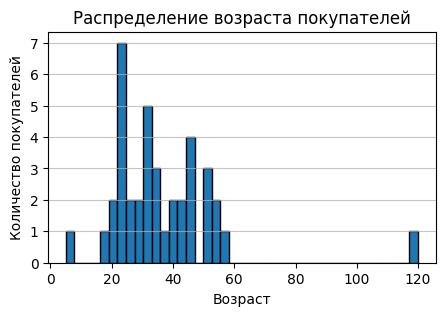

In [27]:
fig, ax = plt.subplots(figsize=(5, 3))

ax.hist(data.age, bins=len(data.age), edgecolor='black')
plt.title('Распределение возраста покупателей')
plt.xlabel('Возраст')
plt.ylabel('Количество покупателей')
plt.grid(axis='y', alpha=0.75)
plt.savefig('figures/age_hist.png')
plt.show()

Боксплот распределения доходов по странам

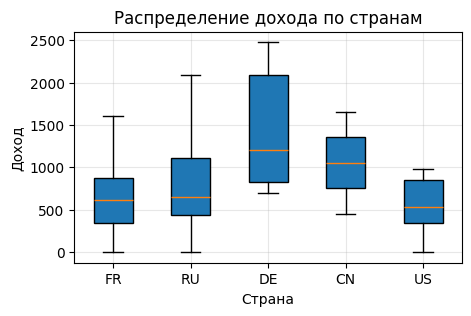

In [28]:
fig, ax = plt.subplots(figsize=(5, 3))
countries = data['country'].unique()
revenue_by_country = []
for con in countries:
  revenue_by_country.append(data[data['country'] == con]['revenue'].dropna().values)

ax.boxplot(revenue_by_country, tick_labels=countries, patch_artist=True)
plt.title('Распределение дохода по странам')
plt.xlabel('Страна')
plt.ylabel('Доход')
plt.grid(alpha=0.3)
plt.savefig('figures/country_revenue_box.png')
plt.show()

Диаграмма рассеяния дохода от количества покупок

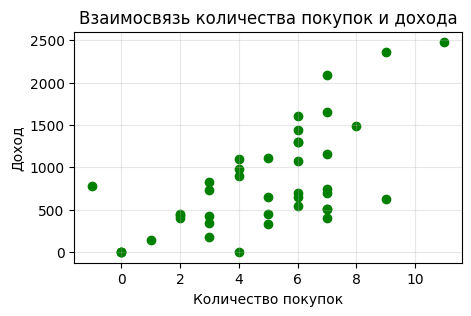

In [29]:
plt.figure(figsize=(5, 3))
plt.scatter(data['purchases'], data['revenue'], c='g')
plt.title('Взаимосвязь количества покупок и дохода')
plt.xlabel('Количество покупок')
plt.ylabel('Доход')
plt.grid(alpha=0.3)
plt.savefig('figures/purch_reven_scatter.png')
plt.show()